# Clause Main Types Analysis

In [1]:
from scripts.imports import *
nt_clause_df = pd.read_csv(
    paths['clause_dataset'],
    index_col='node',
    low_memory=False
)

# bind clauses with time and without together
cl_df = pd.concat([df, nt_clause_df], 0)

# designate some additional parameters for a clause to be "main"

non_main = [
    'InfC', 'InfA', 'Reop', 
    'Voct', 'CPen', 'Ellp', 
    'MSyn',
]

main_df = cl_df[
    (cl_df.cl_rela == 'Main')
    & (~cl_df.cl_type.isin(non_main))
]

out = Exporter(
    paths['outdir'],
    'clause',
)

main_df.shape

(58763, 70)

# Basic Statistics for presence of TA

In [2]:
has_ct = cl_df.has_time.value_counts()

has_ct.index = ['no time', 'time']

has_ct

no time    84473
time        3648
Name: has_time, dtype: int64

In [3]:
has_pr = has_ct / has_ct.sum()

has_pr

no time    0.958602
time       0.041398
Name: has_time, dtype: float64

In [4]:
out.number(
    has_ct['no time'],
    'n_notimecl'
)

'84,473'

In [5]:
out.number(
    has_pr['time'] * 100,
    'perc_timecl'
)

'4'

## Number of Main Clauses

In [6]:
main_ct = main_df.has_time.value_counts()
main_ct.index = ['no time', 'time']
main_pr = main_ct / main_ct.sum()

main_cp = join_ct_pr(main_ct, main_pr)

out.table(
    main_cp,
    'main_cp',
    caption='Clause Counts by Presence of Time Adverbial (main only)'
)

main_cp

,count,percent
no time,56061,95%
time,2702,4%


In [7]:
out.number(
    main_ct['time'],
    'n_time_main',
)

'2,702'

In [8]:
out.number(
    main_ct.sum(),
    'n_main',
)

'58,763'

In [9]:
out.number(
    cl_df.shape[0],
    'n_all_cls'
)

'88,121'

In [10]:
n_covered = main_ct.sum()/cl_df.shape[0]

out.number(
    n_covered*100,
    'n_covered'
)

'67'

# Association Tests

We test for associations by time tag and clause type. The tag allows us to compare clauses with and without time to look for statistical associations.

## By verbform

In [11]:
verb_ct = pivot_ct(
    main_df,
    'has_time',
    'verbform',
)

verb_ct = verb_ct\
    .set_axis(['no', 'yes'], 0)\
    .rename_axis(columns='verb form')\
    .rename_axis(index='has time')\

verb_pr = verb_ct.div(verb_ct.sum(1), 0)

In [12]:
out.table(
    verb_ct,
    'main_verb_ct',
    caption='Frequencies of Main Clauses by Presence of Time'
)

verb form,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp
has time,,,,,,,
no,14029,11779,9299,8373,5911,4204,2466
yes,702,783,187,575,262,83,110


In [13]:
out.table(
    verb_pr.mul(100).round(2).astype(int).astype(str)+'%',
    'main_verb_pr',
    caption='Percent of Clause Group with Verb Form'
)



verb form,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp
has time,,,,,,,
no,25%,21%,16%,14%,10%,7%,4%
yes,25%,28%,6%,21%,9%,3%,4%


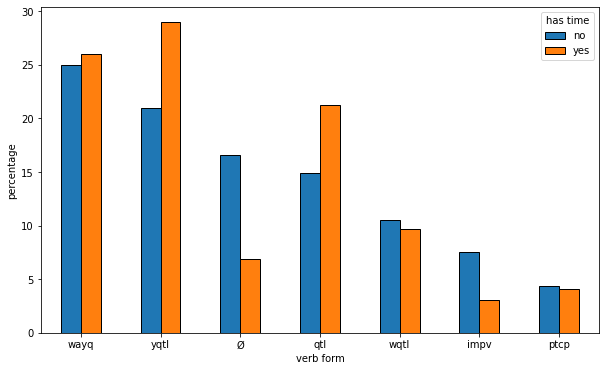

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
verb_pr.mul(100).T.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('percentage')
out.plot(
    'bar_DP_allverbs',
)

In [15]:
verb_dp = sig.apply_deltaP(verb_ct, 0, 1)

verb_dp

verb form,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp
has time,,,,,,,
no,-0.009562,-0.079675,0.096665,-0.06345,0.008474,0.044272,0.003277
yes,0.009562,0.079675,-0.096665,0.06345,-0.008474,-0.044272,-0.003277


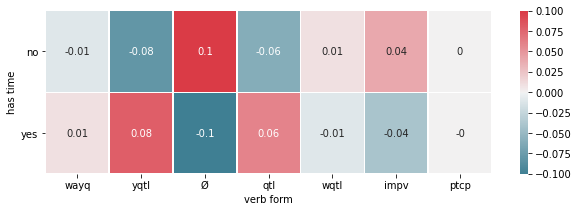

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))
heatmap(verb_dp.round(2), ax=ax, annot=True, square=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
out.plot(
    'heat_dP_allverbs',
)

In [17]:
out.number(
    verb_dp.loc['yes']['yqtl']*100,
    'yestime_yqtl_dp',
)

'8'

In [18]:
out.number(
    verb_dp.loc['yes']['qtl']*100,
    'yestime_qtl_dp',
)

'6'

In [19]:
out.number(
    verb_dp.loc['yes'].abs()['Ø']*100,
    'yestime_Ø_dp',
)

'10'

In [20]:
out.number(
    verb_dp.loc['yes'].abs()['impv']*100,
    'yestime_impv_dp',
)

'4'

# By Rela

In [21]:
rela_ct = pivot_ct(
    cl_df,
    'has_time',
    'cl_rela',
)

rela_ct.index = ['Øtime', 'time']

rela_pr = rela_ct.div(rela_ct.sum(1), 0).round(2)

rela_ct

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,62204,13353,6685,2231
time,3055,369,168,56


In [22]:
rela_pr

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,0.74,0.16,0.08,0.03
time,0.84,0.10,0.05,0.02


In [23]:
rela_dp = sig.apply_deltaP(rela_ct, 0, 1)

rela_dp

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,-0.101068,0.056923,0.033085,0.01106
time,0.101068,-0.056923,-0.033085,-0.01106


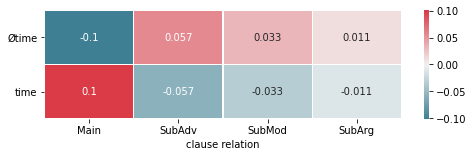

In [24]:
fig, ax = plt.subplots(figsize=(8, 2))
heatmap(rela_dp, ax=ax, annot=True, square=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('clause relation')
plt.show()

# By Type (main only)

In [25]:
htime_ct = pivot_ct(
    main_df,
    'has_time',
    'cl_type2',
)

htime_ct

cl_type2,NmCl,Way0,WayX,WQt0,xYq0,ZIm0,Ptcp,WxY0,xQt0,WXQt,...,WQtH,xIm0,WYqX,WxI0,WXIm,ZImX,XPos,XImp,WImX,xImX
has_time,,,,,,,,,,,,,,,,,,,,,
0,8435,8200,5360,4529,3161,2909,2438,2048,1581,1282,...,256,243,232,78,48,34,24,11,3,1
1,167,266,273,170,298,51,109,141,123,48,...,37,11,6,5,2,2,1,1,0,0


In [26]:
# run a fishers test
htime_dp = sig.apply_deltaP(htime_ct, 0, 1)
htime_dp

cl_type2,NmCl,Way0,WayX,WQt0,xYq0,ZIm0,Ptcp,WxY0,xQt0,WXQt,...,WQtH,xIm0,WYqX,WxI0,WXIm,ZImX,XPos,XImp,WImX,xImX
has_time,,,,,,,,,,,,,,,,,,,,,
0,0.088655,0.047824,-0.005426,0.017871,-0.053904,0.033015,0.003148,-0.015652,-0.01732,0.005103,...,-0.009127,0.000264,0.001918,-0.000459,0.000116,-0.000134,0.000058,-0.000174,0.000054,0.000018
1,-0.088655,-0.047824,0.005426,-0.017871,0.053904,-0.033015,-0.003148,0.015652,0.01732,-0.005103,...,0.009127,-0.000264,-0.001918,0.000459,-0.000116,0.000134,-0.000058,0.000174,-0.000054,-0.000018


In [27]:
# top assocs with time
htime_dp.loc[1].sort_values(ascending=False).head(25)

cl_type2
xYq0    0.053904
WayH    0.051960
xQtX    0.035117
xYqX    0.034364
WxQX    0.019445
WxQ0    0.018070
xQt0    0.017320
WxY0    0.015652
WQtH    0.009127
WxYX    0.007214
WayX    0.005426
WxI0    0.000459
WQtX    0.000270
XImp    0.000174
ZImX    0.000134
xImX   -0.000018
WImX   -0.000054
XPos   -0.000058
WXIm   -0.000116
xIm0   -0.000264
WYqX   -0.001918
Ptcp   -0.003148
XYqt   -0.003650
WXYq   -0.004274
ZYqX   -0.004505
Name: 1, dtype: float64

In [28]:
# top negative assocs with time
htime_dp.loc[1].sort_values().head(25)

cl_type2
NmCl   -0.088655
Way0   -0.047824
ZIm0   -0.033015
WQt0   -0.017871
WIm0   -0.011573
WYq0   -0.011346
AjCl   -0.007952
ZQtX   -0.007818
XQtl   -0.007274
ZQt0   -0.006329
ZYq0   -0.005874
WXQt   -0.005103
ZYqX   -0.004505
WXYq   -0.004274
XYqt   -0.003650
Ptcp   -0.003148
WYqX   -0.001918
xIm0   -0.000264
WXIm   -0.000116
XPos   -0.000058
WImX   -0.000054
xImX   -0.000018
ZImX    0.000134
XImp    0.000174
WQtX    0.000270
Name: 1, dtype: float64

# With Subject

I've noticed a lot of `X` in the attractions above. Let's see if there is a prediction for 
subject with time.

In [29]:
cl_df.has_subj.value_counts()

0    53840
1    34281
Name: has_subj, dtype: int64

In [30]:
subj_ct = pivot_ct(
    cl_df,
    'has_time',
    'has_subj',
)

subj_pr = subj_ct.div(subj_ct.sum(1), 0)

subj_ct

has_subj,0,1
has_time,,
0,51427,33046
1,2413,1235


In [31]:
subj_pr

has_subj,0,1
has_time,,
0,0.608798,0.391202
1,0.661458,0.338542


In [32]:
subj_dp = sig.apply_deltaP(subj_ct, 0, 1)

subj_dp

has_subj,0,1
has_time,,
0,-0.05266,0.05266
1,0.05266,-0.05266


# By Function

In [33]:
main_df.function.value_counts()

simultaneous                                 1360
atelic_ext                                    443
anterior_dur                                  354
posterior                                     202
posterior_dur                                  42
begin_to_end                                   42
habitual                                       39
purposive_ext                                  27
simultaneous + atelic_ext                      21
anterior_dur_past?                             17
anterior_dur_purposive                         15
regular_recurrence                             15
multi_simuls                                   15
anterior                                       13
telic_ext                                      10
begin_to_end_habitual                           5
dist_fut                                        5
dur_to_end                                      5
dist_posterior                                  4
habitual?                                       4


In [34]:
function_ct = pivot_ct(
    main_df,
    'function',
    'verbform',
)

# select primary functions of interest
select = [
    'simultaneous', 'atelic_ext', 'anterior_dur',
    'posterior', 'posterior_dur', 'begin_to_end',
    'habitual', 'telic_ext', 'anterior', 
]

function_ct = function_ct.loc[select]

print(function_ct.shape)

(9, 7)


In [35]:
out.table(
    function_ct,
    'verbfunct_ct',
    caption='Collocation Counts of Time Adverbial Function with Verb Type'
)

verbform,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv
function,,,,,,,
simultaneous,379,343,304,131,100,56,47
atelic_ext,106,154,98,44,18,13,10
anterior_dur,158,53,37,49,29,19,9
posterior,58,85,50,3,5,1,0
posterior_dur,1,4,27,0,5,5,0
begin_to_end,12,9,6,1,4,5,5
habitual,16,4,3,6,5,2,3
telic_ext,3,4,2,1,0,0,0
anterior,6,1,3,0,2,1,0


In [36]:
function_ct.size # N-datapoints

63

In [37]:
# fishers
function_fs, function_odds = sig.apply_fishers(function_ct, 0, 1)
function_dp = sig.apply_deltaP(function_ct, 0, 1)
function_dp2 = sig.apply_deltaP(function_ct.T, 0, 1)

df_highlighter(function_fs, rule='fishers')

,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv
simultaneous,-1.275333,-0.660565,0.934850,0.167522,0.761915,0.036437,0.908597
atelic_ext,-2.314062,4.887235,0.216071,0.184563,-1.921604,-0.634516,-0.357826
anterior_dur,10.182000,-7.135320,-7.665332,2.518538,0.601069,0.719198,-0.133144
posterior,-0.059388,6.388548,0.681621,-5.438726,-2.096173,-2.582142,-2.438312
posterior_dur,-5.020401,-1.914102,8.869219,-1.537249,0.700048,1.584037,-0.197363
begin_to_end,0.000000,-0.224574,-0.465581,-0.754601,0.279880,1.584037,2.147601
habitual,0.941917,-1.587664,-1.341114,0.586590,0.741179,0.172799,0.974106
telic_ext,-0.000000,0.522009,0.000000,-0.000000,0.000000,0.000000,0.000000
anterior,0.652398,-0.689600,0.128342,-0.203932,0.667105,0.378545,0.000000


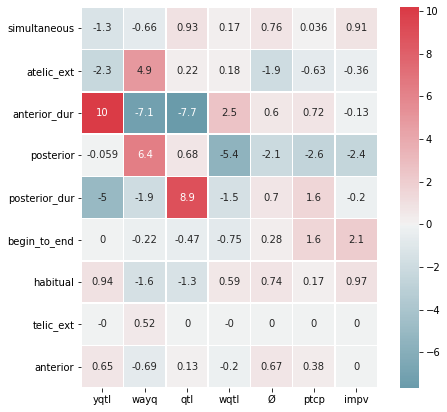

In [38]:
fig, ax = plt.subplots(figsize=(8, 7))
heatmap(function_fs.head(20), ax=ax, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
out.plot(
    'heat_fs_timeverb'
)

In [39]:
ts.show(main_df[
    (main_df.verbform == 'yqtl')
    & (main_df.function == 'anterior_dur')
], extra=['cl_type'])

showing 25 of 158


,verse,clause,verb_utf8,cl_type
node,,,,
428066,Genesis 6:3,לֹֽא־יָדֹ֨ון רוּחִ֤י בָֽאָדָם֙ לְעֹלָ֔ם,דון,xYqX
435621,Exodus 19:9,וְגַם־בְּךָ֖ יַאֲמִ֣ינוּ לְעֹולָ֑ם,אמן,WxY0
439421,Leviticus 15:10,וְכָל־יִטְמָ֖א עַד־הָעָ֑רֶב,טמא,WXYq
440605,Leviticus 25:40,עַד־שְׁנַ֥ת הַיֹּבֵ֖ל יַעֲבֹ֥ד עִמָּֽךְ׃,עבד,xYq0
446673,Deuteronomy 16:4,וְלֹא־יָלִ֣ין מִן־הַבָּשָׂ֗ר לַבֹּֽקֶר׃,לין,WxY0
454477,1_Samuel 5:5,עַל־כֵּ֡ן לֹֽא־יִדְרְכוּ֩ כֹהֲנֵ֨י דָגֹ֜ון וְכָֽל־עַל־מִפְתַּ֥ן דָּגֹ֖ון בְּאַשְׁדֹּ֑וד עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ ס,דרך,xYqX
458751,2_Samuel 7:29,וּמִבִּרְכָ֣תְךָ֔ יְבֹרַ֥ךְ בֵּֽית־עַבְדְּךָ֖ לְעֹולָֽם׃ פ,ברך,WxYX
469150,Isaiah 13:20,לֹֽא־תֵשֵׁ֣ב לָנֶ֔צַח,ישׁב,xYq0
470773,Isaiah 34:17,לְדֹ֥ור וָדֹ֖ור יִשְׁכְּנוּ־בָֽהּ׃ ס,שׁכן,xYq0


In [40]:
function_dp

verbform,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv
function,,,,,,,
simultaneous,-0.035734,-0.022030,0.026149,0.005494,0.014141,0.001002,0.010978
atelic_ext,-0.067706,0.103692,0.011714,0.006694,-0.032113,-0.013817,-0.008464
anterior_dur,0.176221,-0.131082,-0.124676,0.051947,0.017300,0.015086,-0.004795
posterior,-0.008573,0.172420,0.039101,-0.085887,-0.046025,-0.038905,-0.032132
posterior_dur,-0.275825,-0.169886,0.438635,-0.095412,0.052868,0.079665,-0.030045
begin_to_end,-0.009454,-0.048808,-0.069892,-0.071197,0.028653,0.079665,0.091033
habitual,0.117069,-0.162237,-0.136783,0.060983,0.062106,0.010731,0.048132
telic_ext,0.005010,0.138277,-0.011623,0.006212,-0.067335,-0.040882,-0.029659
anterior,0.167397,-0.186319,0.019293,-0.094302,0.087233,0.036393,-0.029695


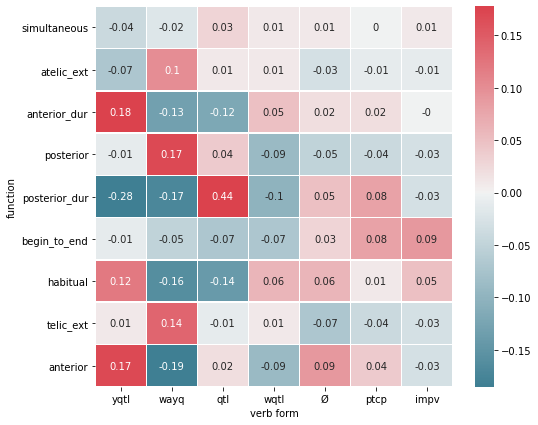

In [41]:
fig, ax = plt.subplots(figsize=(8, 7))
heatmap(function_dp.head(20).round(2), ax=ax, square=False, robust=True, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('verb form')
out.plot(
    'heat_dp_timeverb'
)

## TA Modifier / Verb Collocations

In [42]:
main_df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'firstw', 'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela',
       'cl_type', 'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'verbform', 'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj',
       'has_oc', 'cl_type2', 'cl_clust50', 'cl_clust10', 'verbtense',
       'vt_order', 'PP', 'front_etcbc', 'front', 'tag', 'unmodified',
       'has_time', 'APPO', 'DEF', 'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM',
       'PARA', 'DEMON', 'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3',
       'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [47]:
select_modis = ['DEF', 'PL', 'NUM', 'SFX', 'DEMON', 'GP', 'ORDN', 'QUANT']

In [48]:
time_df = main_df[
    (main_df.has_time == 1)
    & (main_df.n_times == 1)
].copy()
time_df[select_modis] = time_df[select_modis].astype(int)

In [49]:
verbmod_ct = pivot_ct(
    time_df,
    select_modis,
    'verbform',
)

In [50]:
verbmod_ct

verbform                            yqtl  wayq  qtl  wqtl   Ø  ptcp  impv
DEF PL NUM SFX DEMON GP ORDN QUANT                                       
0   0  0   0   0     0  0    0       282    83  123    35  59    32    19
1   0  0   0   0     0  0    0        86    94   60    45  39    23    32
               1     0  0    0        80   147   63    61  12    10     1
0   0  0   0   0     1  0    0        55    36   63    16  12     6     6
    1  1   0   0     0  0    0        49    63   24    22   1     1     7
    0  1   0   0     0  0    0        17    53   53    10   1     1     0
1   0  0   0   0     0  1    0        31    44   15    18  11     2     4
0   1  0   1   0     0  0    0        13     6   29     2   2     3     0
1   1  0   0   1     0  0    0         6    12   13     1   7     3     0
    0  0   0   0     0  0    1         8    14   10     0   5     3     1
0   1  0   0   0     1  0    0         6     7   15     0   6     3     1
                     0  0    0         8     8    9     1   7     0     0
                     1  0    1        10     7    5     5   1     2     1
    0  0   1   0     0  0    0        15     1    3     5   3     2     0
1   1  0   0   0     0  0    1         5     4    2    10   3     1     0
0   0  0   0   0     0  0    1         7     0    5     2   0     4     2
    1  0   0   0     0  0    1         5    12    1     0   0     0     0
1   1  0   0   0     0  0    0         5     0    1     8   1     0     1
0   1  0   1   0     0  0    1         5     1    7     0   0     0     0
1   1  1   0   0     0  0    0         1     5    0     0   0     0     0
0   1  1   0   0     1  0    0         2     1    0     2   0     0     0
    0  0   0   1     0  0    0         1     0    2     0   0     0     0
1   0  0   0   1     0  0    1         0     0    1     0   0     1     0
               0     1  0    0         0     1    0     0   0     0     0
0   0  0   1   0     0  0    1         0     1    0     0   0     0     0

In [53]:
# Fishers test

verbmod_fs, verbmod_odds = sig.apply_fishers(verbmod_ct, 0, 1)

verbmod_fs.index.names = verbmod_ct.index.names

verbmod_fs

yqtl       wayq       qtl      wqtl  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                             
0   0  0   0   0     0  0    0      21.415341 -16.609153 -0.632164 -5.603960   
1   0  0   0   0     0  0    0      -2.683206  -0.047013 -2.223886  0.638623   
               1     0  0    0      -3.600103  10.424384 -1.563898  4.261791   
0   0  0   0   0     1  0    0      -0.060892  -1.514847  3.967975 -0.410665   
    1  1   0   0     0  0    0      -0.000000   3.707273 -1.522010  0.733020   
    0  1   0   0     0  0    0      -5.438787   3.681217  6.165072 -0.511469   
1   0  0   0   0     0  1    0      -0.505552   1.970628 -2.030987  0.897567   
0   1  0   1   0     0  0    0      -0.343734  -1.938444  6.762878 -0.933272   
1   1  0   0   1     0  0    0      -1.415833   0.227126  0.897285 -0.924622   
    0  0   0   0     0  0    1      -0.648919   0.692712  0.246856 -1.739664   
0   1  0   0   0     1  0    0      -1.138034  -0.346089  2.067557 -1.551888   
                     0  0    0      -0.154900   0.000000  0.407894 -0.607281   
                     1  0    1       0.158671  -0.076961 -0.181489  0.624671   
    0  0   1   0     0  0    0       1.916647  -2.387434 -0.753938  0.678543   
1   1  0   0   0     0  0    1      -0.418743  -0.443728 -0.857636  4.085653   
0   0  0   0   0     0  0    1       0.205974  -2.407891  0.227614  0.000000   
    1  0   0   0     0  0    1       0.000000   3.635189 -0.835429 -0.608603   
1   1  0   0   0     0  0    0       0.102572  -1.765958 -0.660321  4.190818   
0   1  0   1   0     0  0    1       0.266525  -0.687715  2.027616 -0.413947   
1   1  1   0   0     0  0    0      -0.168657   2.326289 -0.451835  0.000000   
0   1  1   0   0     1  0    0       0.198585   0.000000 -0.228578  1.075817   
    0  0   0   1     0  0    0      -0.000000  -0.238814  0.939733  0.000000   
1   0  0   0   1     0  0    1       0.000000   0.000000  0.422606  0.000000   
               0     1  0    0       0.000000   0.599519  0.000000  0.000000   
0   0  0   1   0     0  0    1       0.000000   0.599519  0.000000  0.000000   

                                           Ø      ptcp      impv  
DEF PL NUM SFX DEMON GP ORDN QUANT                                
0   0  0   0   0     0  0    0      1.830347  0.800344 -0.048337  
1   0  0   0   0     0  0    0      1.920383  1.341788  7.765605  
               1     0  0    0     -3.183819 -0.810317 -4.186062  
0   0  0   0   0     1  0    0     -0.113367 -0.242042  0.000000  
    1  1   0   0     0  0    0     -4.179804 -1.887179  0.441312  
    0  1   0   0     0  0    0     -3.096094 -1.386517 -1.693430  
1   0  0   0   0     0  1    0      0.325702 -0.622612 -0.000000  
0   1  0   1   0     0  0    0     -0.366476  0.311466 -0.379465  
1   1  0   0   1     0  0    0      1.576656  0.615690 -0.192853  
    0  0   0   0     0  0    1      0.677077  0.635844  0.000000  
0   1  0   0   0     1  0    0      1.309073  0.701191  0.000000  
                     0  0    0      2.141761 -0.191879 -0.204676  
                     1  0    1     -0.141683  0.441930 -0.000000  
    0  0   1   0     0  0    0      0.339616  0.479671  0.000000  
1   1  0   0   0     0  0    1      0.379194  0.000000  0.000000  
0   0  0   0   0     0  0    1     -0.405506  2.123136  0.890066  
    1  0   0   0     0  0    1     -0.197943  0.000000  0.000000  
1   1  0   0   0     0  0    0      0.000000  0.000000  0.396756  
0   1  0   1   0     0  0    1     -0.209454  0.000000  0.000000  
1   1  1   0   0     0  0    0      0.000000  0.000000  0.000000  
0   1  1   0   0     1  0    0      0.000000  0.000000  0.000000  
    0  0   0   1     0  0    0      0.000000  0.000000  0.000000  
1   0  0   0   1     0  0    1      0.000000  1.098698  0.000000  
               0     1  0    0      0.000000  0.000000  0.000000  
0   0  0   1   0     0  0    1      0.000000  0.000000  0.000000

[Text(0.5, 0, 'yqtl'),
 Text(1.5, 0, 'wayq'),
 Text(2.5, 0, 'qtl'),
 Text(3.5, 0, 'wqtl'),
 Text(4.5, 0, 'Ø'),
 Text(5.5, 0, 'ptcp'),
 Text(6.5, 0, 'impv')]

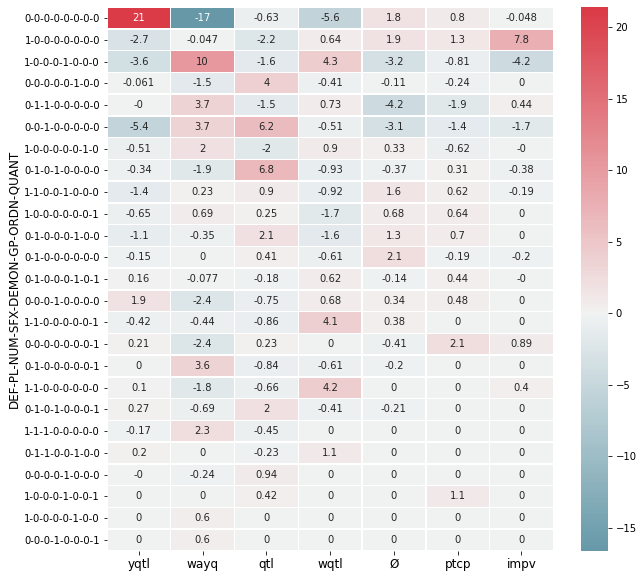

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap(verbmod_fs, square=False, annot=True)
ax.set_ylabel(ax.get_ylabel(), size=12)
ax.set_xticklabels(ax.get_xticklabels(), size=12)

In [59]:
# DeltaP test

verbmod_dp = sig.apply_deltaP(verbmod_ct, 0, 1)
verbmod_dp2 = sig.apply_deltaP(verbmod_ct.T, 0, 1)

verbmod_dp

verbform                                yqtl      wayq       qtl      wqtl  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                           
0   0  0   0   0     0  0    0      0.208761 -0.163801 -0.023029 -0.063361   
1   0  0   0   0     0  0    0     -0.077522 -0.004096 -0.062914  0.020079   
               1     0  0    0     -0.092756  0.167899 -0.050736  0.072644   
0   0  0   0   0     1  0    0     -0.009378 -0.071732  0.123556 -0.021084   
    1  1   0   0     0  0    0      0.001390  0.135245 -0.072601  0.032142   
    0  1   0   0     0  0    0     -0.176162  0.149589  0.192237 -0.029435   
1   0  0   0   0     0  1    0     -0.046560  0.106091 -0.096276  0.044487   
0   1  0   1   0     0  0    0     -0.057073 -0.145735  0.323498 -0.067025   
1   1  0   0   1     0  0    0     -0.151938  0.034861  0.100053 -0.079433   
    0  0   0   0     0  0    1     -0.098695  0.091570  0.033241 -0.103625   
0   1  0   0   0     1  0    0     -0.136398 -0.068345  0.186474 -0.103492   
                     0  0    0     -0.050393 -0.009169  0.062358 -0.072544   
                     1  0    1      0.030861 -0.025998 -0.050599  0.060229   
    0  0   1   0     0  0    0      0.227891 -0.219654 -0.109110  0.071438   
1   1  0   0   0     0  0    1     -0.093096 -0.092435 -0.132622  0.301313   
0   0  0   0   0     0  0    1      0.058369 -0.253593  0.039096 -0.001860   
    1  0   0   0     0  0    1     -0.014452  0.418356 -0.156860 -0.102618   
1   1  0   0   0     0  0    0      0.020517 -0.253165 -0.149736  0.400844   
0   1  0   1   0     0  0    1      0.093001 -0.175500  0.329022 -0.102402   
1   1  1   0   0     0  0    0     -0.125770  0.583333 -0.211765 -0.102101   
0   1  1   0   0     1  0    0      0.108106 -0.051575 -0.211676  0.298782   
    0  0   0   1     0  0    0      0.041265 -0.251783  0.456008 -0.101972   
1   0  0   0   1     0  0    1     -0.292366 -0.251678  0.289010 -0.101930   
               0     1  0    0     -0.292243  0.748847 -0.211321 -0.101887   
0   0  0   1   0     0  0    1     -0.292243  0.748847 -0.211321 -0.101887   

verbform                                   Ø      ptcp      impv  
DEF PL NUM SFX DEMON GP ORDN QUANT                                
0   0  0   0   0     0  0    0      0.029887  0.013474 -0.001929  
1   0  0   0   0     0  0    0      0.037631  0.023815  0.063008  
               1     0  0    0     -0.046443 -0.016503 -0.034106  
0   0  0   0   0     1  0    0     -0.010225 -0.010587 -0.000550  
    1  1   0   0     0  0    0     -0.070172 -0.037275  0.011272  
    0  1   0   0     0  0    0     -0.067670 -0.035240 -0.033319  
1   0  0   0   0     0  1    0      0.017677 -0.026017  0.000598  
0   1  0   1   0     0  0    0     -0.035708  0.014219 -0.032175  
1   1  0   0   1     0  0    0      0.097127  0.031326 -0.031997  
    0  0   0   0     0  0    1      0.051589  0.033085 -0.007166  
0   1  0   0   0     1  0    0      0.088048  0.038913 -0.005200  
                     0  0    0      0.142848 -0.041224 -0.031874  
                     1  0    1     -0.039504  0.024176  0.000836  
    0  0   1   0     0  0    0      0.032595  0.028660 -0.031820  
1   1  0   0   0     0  0    1      0.049267 -0.000661 -0.031766  
0   0  0   0   0     0  0    1     -0.071851  0.160693  0.069146  
    1  0   0   0     0  0    1     -0.071791 -0.040963 -0.031672  
1   1  0   0   0     0  0    0     -0.008808 -0.040928  0.031276  
0   1  0   1   0     0  0    1     -0.071639 -0.040877 -0.031606  
1   1  1   0   0     0  0    0     -0.071429 -0.040756 -0.031513  
0   1  1   0   0     1  0    0     -0.071399 -0.040739 -0.031499  
    0  0   0   1     0  0    0     -0.071339 -0.040705 -0.031473  
1   0  0   0   1     0  0    1     -0.071309  0.459732 -0.031460  
               0     1  0    0     -0.071279 -0.040671 -0.031447  
0   0  0   1   0     0  0    1     -0.071279 -0.040671 -0.031447

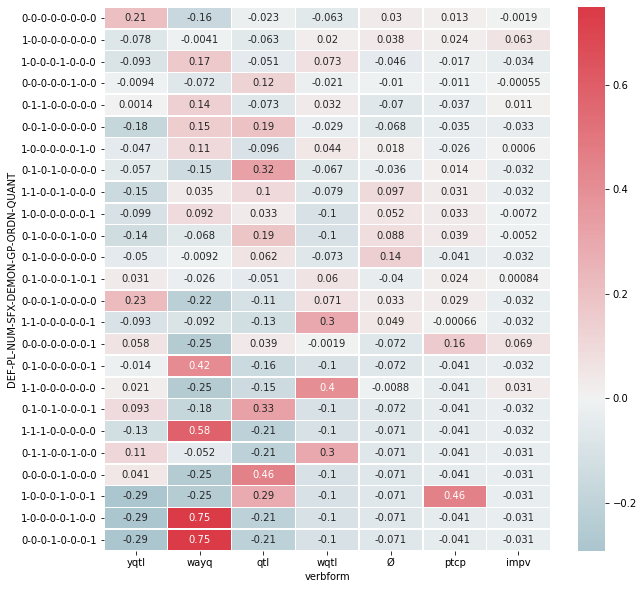

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap(verbmod_dp, square=False, annot=True)

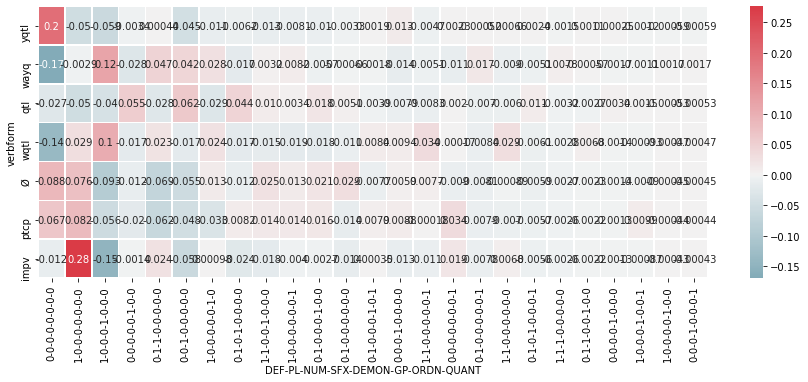

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))
heatmap(verbmod_dp2, square=False, annot=True)